In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
operando_redlaser_df = pd.read_csv('groupe3b_CV_0.1mV_s_red_laser_C01.txt',header=None)
operando_redlaser_df = operando_redlaser_df[0].str.split(expand=True)
operando_redlaser_df.columns = operando_redlaser_df.iloc[0]
operando_redlaser_df = operando_redlaser_df.drop(0)
operando_redlaser_df.drop(['number'],axis=1)
operando_redlaser_df = operando_redlaser_df.astype(float)

operando_blue1_df = pd.read_csv('group_b_operando_2_blue_15s_x10_25p_C01.txt',header=None)
operando_blue1_df = operando_blue1_df[0].str.split(expand=True)
operando_blue1_df.columns = operando_blue1_df.iloc[0]
operando_blue1_df = operando_blue1_df.drop(0)
operando_blue1_df.drop(['number'],axis=1)
operando_blue1_df = operando_blue1_df.astype(float)

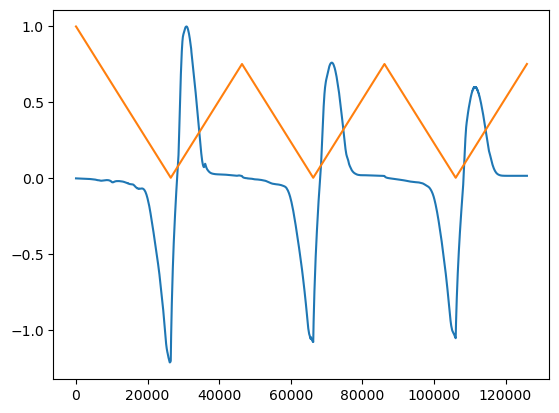

In [3]:
plt.plot(operando_redlaser_df['time/s'],operando_redlaser_df['<I>/mA']/np.max(operando_redlaser_df['<I>/mA']))
plt.plot(operando_redlaser_df['time/s'],operando_redlaser_df['Ewe/V']/np.max(operando_redlaser_df['Ewe/V']))

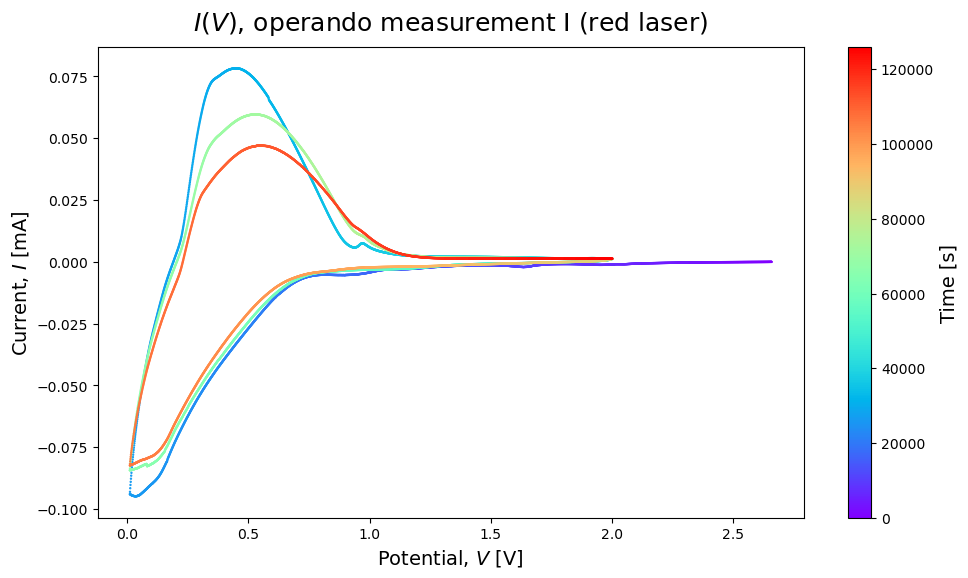

In [4]:
fig,ax=plt.subplots(figsize=(10,6.7))
scat = ax.scatter(operando_redlaser_df['Ewe/V'],operando_redlaser_df['<I>/mA'],c=operando_redlaser_df['time/s'], cmap='rainbow',s=0.5)
cbar = fig.colorbar(scat,ax=ax)
cbar.set_label('Time [s]',fontsize=14)
ax.set_xlabel('Potential, $V$ [V]',fontsize=14)
ax.set_ylabel('Current, $I$ [mA]',fontsize=14)
ax.set_title('$I(V)$, operando measurement I (red laser)',fontsize=18,pad=12)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig('pot_current_red.png')
plt.show()


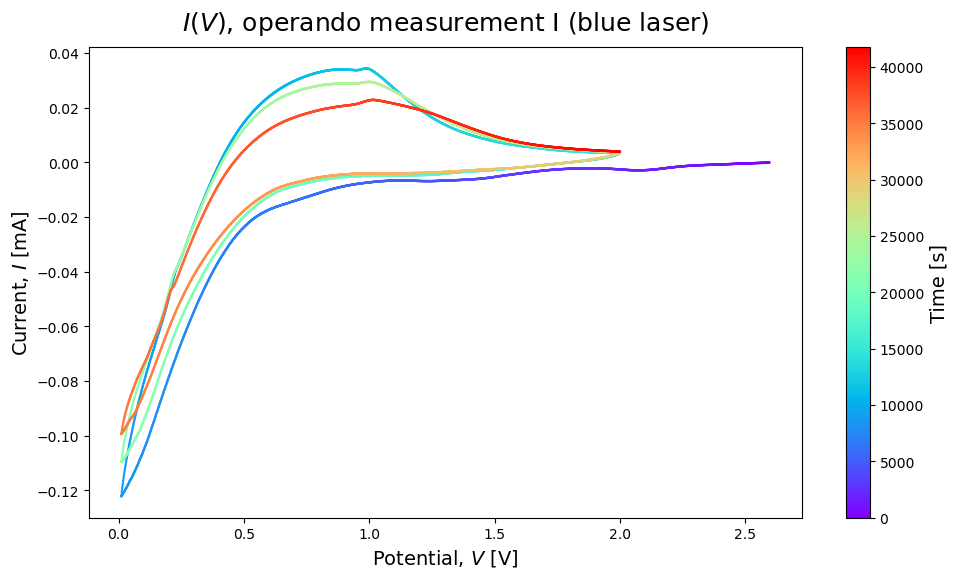

In [5]:
fig,ax=plt.subplots(figsize=(10,6.7))
scat = ax.scatter(operando_blue1_df['Ewe/V'],operando_blue1_df['<I>/mA'],c=operando_blue1_df['time/s'], cmap='rainbow',s=0.5)
cbar = fig.colorbar(scat,ax=ax)
cbar.set_label('Time [s]',fontsize=14)
ax.set_xlabel('Potential, $V$ [V]',fontsize=14)
ax.set_ylabel('Current, $I$ [mA]',fontsize=14)
ax.set_title('$I(V)$, operando measurement I (blue laser)',fontsize=18,pad=12)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig('pot_current_blue.png')
plt.show()


In [6]:
charge_red = np.array(operando_redlaser_df['time/s'] * operando_redlaser_df['<I>/mA'])
acc_charge = []
charge = 0
for i,val in enumerate(charge_red):
    charge += val * 1e-3
    acc_charge.append(charge)
operando_redlaser_df.insert(4,'acc_charge',acc_charge)

charge_blue = operando_blue1_df['time/s'] * operando_blue1_df['<I>/mA']
acc_charge_blue = []
charge_b = 0
for i,val in enumerate(charge_blue):
    charge_b += val * 1e-3
    acc_charge_blue.append(charge_b)

operando_blue1_df.insert(4,'acc_charge',acc_charge_blue)

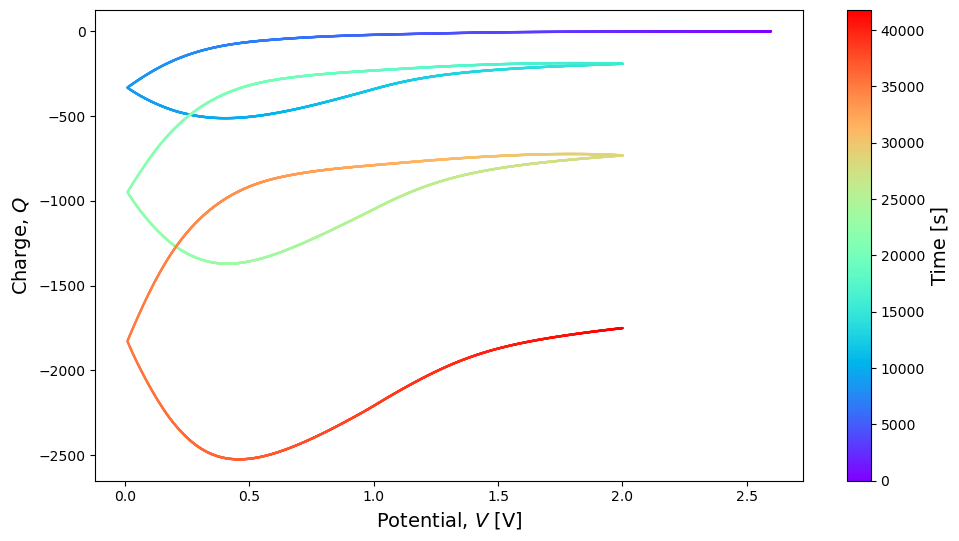

In [7]:
fig,ax=plt.subplots(figsize=(10,6.7))
scat = ax.scatter(operando_blue1_df['Ewe/V'],operando_blue1_df['acc_charge'],c=operando_blue1_df['time/s'], cmap='rainbow',s=0.5)
cbar = fig.colorbar(scat,ax=ax)
cbar.set_label('Time [s]',fontsize=14)
ax.set_xlabel('Potential, $V$ [V]',fontsize=14)
ax.set_ylabel('Charge, $Q$',fontsize=14)
# ax.set_title('$I(V)$, operando measurement I (blue laser)',fontsize=18,pad=12)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

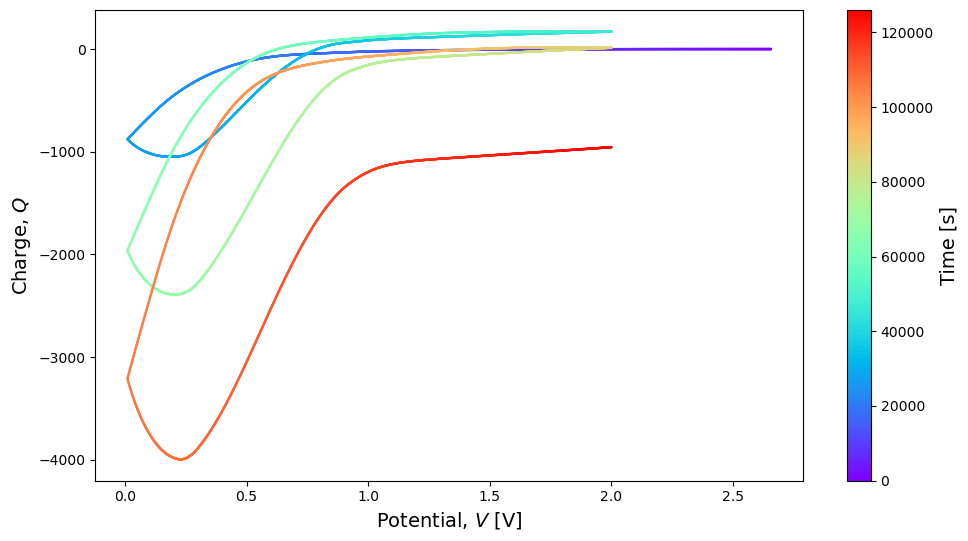

In [8]:
fig,ax=plt.subplots(figsize=(10,6.7))
scat = ax.scatter(operando_redlaser_df['Ewe/V'],operando_redlaser_df['acc_charge'],c=operando_redlaser_df['time/s'], cmap='rainbow',s=0.5)
cbar = fig.colorbar(scat,ax=ax)
cbar.set_label('Time [s]',fontsize=14)
ax.set_xlabel('Potential, $V$ [V]',fontsize=14)
ax.set_ylabel('Charge, $Q$',fontsize=14)
# ax.set_title('$I(V)$, operando measurement I (blue laser)',fontsize=18,pad=12)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

In [22]:
raman_df = pd.read_csv('operando_blue_laser_15x10_25p_3_cycles.txt',header=None)
raman_df = raman_df[0].str.split(expand=True).astype(float)
raman_df.iloc[0, 1:] = raman_df.iloc[0, :-1].values
raman_df.iloc[0, 0] = None 
raman_df.rename(columns={0:'timestamp'},inplace=True)

raman_df_notime = raman_df.drop(labels=['timestamp'],axis=1).transpose()
raman_df_notime.rename(columns={0:'wave number'},inplace=True)
timestamps = raman_df['timestamp'][1:]

raman_df_just_raman = raman_df_notime.drop(labels='wave number',axis=1)
raman_df_just_raman = raman_df_just_raman.rename(columns=timestamps)

In [10]:
import background_red 

mean_raman = (raman_df_notime.sum(axis=1) - raman_df_notime['wave number']) / raman_df_notime.shape[1]

In [11]:
corr1 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='sh')
corr2 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='ah')
corr3 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='stq')
corr4 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[1]),ord=3,s=1e-3,fct='atq')

corrected1 = raman_df_notime[1] - corr1[0]
corrected2 = raman_df_notime[1] - corr2[0] # bäst? 
corrected3 = raman_df_notime[1] - corr3[0] # dålig
corrected4 = raman_df_notime[1] - corr4[0]

In [12]:
corr1 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='sh')
corr2 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='ah')
corr3 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='stq')
corr4 = background_red.backcor(np.array(raman_df_notime['wave number']),np.array(raman_df_notime[530]),ord=3,s=1e-5,fct='atq')

corrected1 = raman_df_notime[1] - corr1[0]
corrected2 = raman_df_notime[1] - corr2[0] # bäst? 
corrected3 = raman_df_notime[1] - corr3[0] # dålig
corrected4 = raman_df_notime[1] - corr4[0]

549